In [22]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical data

In [23]:
df_train = pd.read_csv("try out_TRAIN_zidan.csv")
df_test = pd.read_csv("try out_TEST_zidan(1).csv")

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
y_test

245895    0
98194     0
36463     0
249923    0
158389    0
         ..
256564    0
278889    0
221828    0
190245    0
253004    0
Name: TARGET, Length: 61503, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [26]:
from sklearn.linear_model import LogisticRegression


# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from sklearn import set_config

set_config(print_changed_only=False)

log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
X_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,384575,0,1,1,0,2,207000.0,465457.5,52641.0,418500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,214010,0,0,1,1,0,247500.0,1281712.5,48946.5,1179000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
36463,142232,0,0,1,0,0,202500.0,495000.0,39109.5,495000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
249923,389171,0,0,0,1,0,247500.0,254700.0,24939.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
158389,283617,0,1,0,1,0,112500.0,308133.0,15862.5,234000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256564,396891,1,1,1,1,2,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
278889,423085,0,0,0,1,0,225000.0,202500.0,24030.0,202500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
221828,356971,0,1,0,1,0,121500.0,254700.0,30357.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
190245,320581,0,1,1,1,1,112500.0,1314117.0,38551.5,1147500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


y_pred_proba = log_reg.predict_proba(X_test)[:,1]
#y_pred_custom = (y_pred_proba <= 0.4).astype(int)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.6030798403002631


In [29]:
y_pred = log_reg.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.587158349999187
Precision: 0.1060664456949048
Recall: 0.5560719337239847
F1-Score: 0.1781518044991099
Confusion Matrix:
[[33360 23194]
 [ 2197  2752]]


In [25]:
y_pred_df = pd.DataFrame(y_pred, columns=['TARGET'])

In [26]:
y_pred_df

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
61498,0
61499,0
61500,0
61501,0


In [28]:
y_pred_df["TARGET"].value_counts()

TARGET
0    61502
1        1
Name: count, dtype: int64

In [36]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [31]:
y_pred_test = log_reg.predict(df_test)

In [32]:
y_pred_test

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
pred_df = pd.DataFrame(y_pred_test, columns=["TARGET"])
pred_df

,TARGET
0,0
1,0
2,1
3,0
4,0
...,...
48739,1
48740,1
48741,1
48742,1


In [34]:
pred_df["TARGET"].nunique()

2

In [35]:
df_id["SK_ID_CURR"] = df_test["SK_ID_CURR"]

NameError: name 'df_id' is not defined

In [36]:
df_id_df = pd.DataFrame(df_test, columns=["SK_ID_CURR"])

In [23]:
df_id_df

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [37]:
final_sub = pd.concat([df_id_df, pred_df ], axis=1)
final_sub

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,1
3,100028,0
4,100038,0
...,...,...
48739,456221,1
48740,456222,1
48741,456223,1
48742,456224,1


In [25]:
final_sub.to_csv("submit_zidan.csv", index=False)

In [38]:
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:

import shap
#3. Menghitung SHAP Values
# Membuat explainer menggunakan TreeExplainer untuk model berbasis pohon
explainer = shap.TreeExplainer(log_reg)

# Menghitung SHAP values untuk data uji
shap_values = explainer.shap_values(X_test)

Provided model function fails when applied to the provided data set.


TypeError: 'LogisticRegression' object is not callable

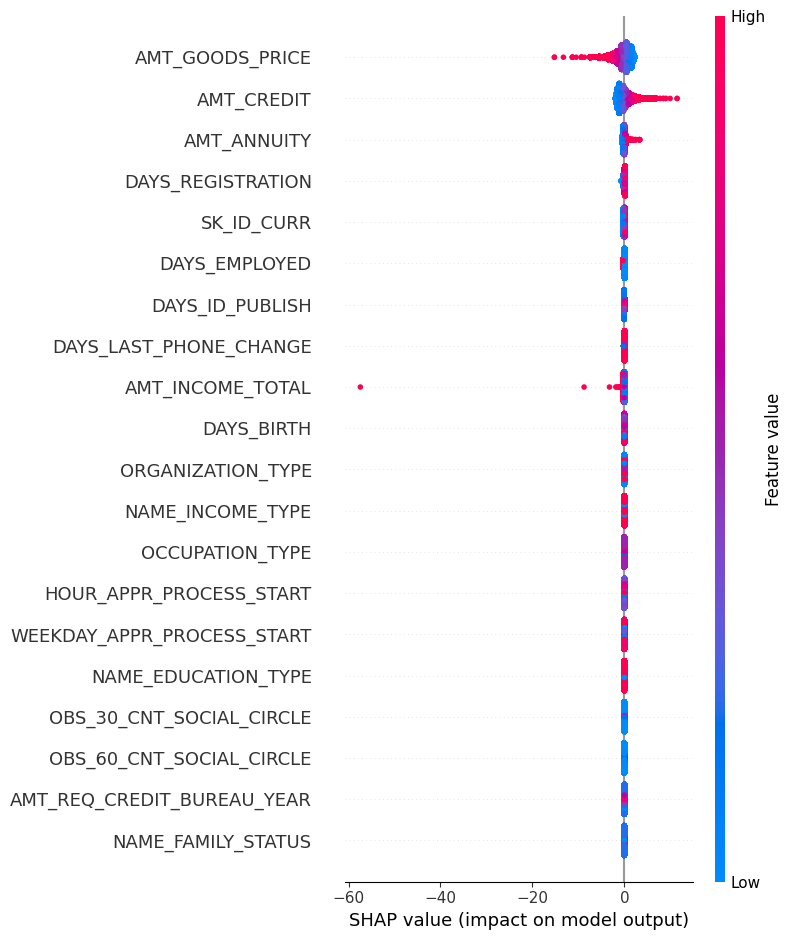

In [40]:
shap.initjs()

# 2. Create a SHAP Explainer
explainer = shap.Explainer(log_reg, X_train)

# 3. Calculate SHAP values for the test set
shap_values = explainer(X_test)

# 4. Visualize SHAP values
# Summary plot
shap.summary_plot(shap_values, X_test)

# Force plot for the first test sample
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])